## Import all packages and data

In [1]:
# Standard Packages
import pandas as pd
import numpy as np
import markdown

# Viz Packages
import seaborn as sns
import matplotlib.pyplot as plt

# Scipy Stats
import scipy.stats as stats 

# Statsmodel Api
import statsmodels.api as sm
from statsmodels.formula.api import ols

# SKLearn Modules
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures


# Suppress future and deprecation warnings
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
hd = pd.read_csv("data/kc_house_data.csv")
f = open('data/column_names.md', 'r')
desc=markdown.markdown( f.read() )
hd

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [3]:
hd["price"].describe()

count    3.015500e+04
mean     1.108536e+06
std      8.963857e+05
min      2.736000e+04
25%      6.480000e+05
50%      8.600000e+05
75%      1.300000e+06
max      3.075000e+07
Name: price, dtype: float64

In [4]:
hd.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [5]:
hd["grade"]

0        7 Average
1        7 Average
2        7 Average
3         9 Better
4        7 Average
           ...    
30150       8 Good
30151    7 Average
30152    7 Average
30153       8 Good
30154    7 Average
Name: grade, Length: 30155, dtype: object

In [6]:
#add zip column for zipcodes
hd["zip"] = hd.address.str[-20:-15]

#remove data that is outside of King County
zips=[98052,98115,98103,98092,98042,98023,98105,98003,98034,98118,98133,98058,98125,98031,98122,98033,98006,98032,98030,98004,98001,98059,98117,98056,98198,98168,98155,98027,98109,98002,98038,98144,98146,98074,98119,98007,98040,98029,98107,98011,98108,98072,98106,98178,98116,98112,98008,98053,98028,98126,98188,98102,98055,98075,98177,98022,98166,98199,98005,98121,98136,98045,98057,98019,98104,98077,98101,98065,98148,98070,98014,98354,98024,98051,98010,98047,98251,98134,98039,98195,98158,98068,98256,98288,98050,98132,98171,98184,98054,98009,98013,98015,98025,98035,98041,98062,98064,98063,98071,98073,98083,98089,98093,98111,98113,98114,98124,98127,98131,98129,98139,98138,98141,98145,98151,98154,98160,98164,98161,98165,98170,98174,98175,98181,98185,98190,98194,98191,98224,98471,98481]
zips_strings = [str(i) for i in zips]
zips = zips_strings
non_wa_zips = hd.loc[~hd["zip"].isin(zips)]
hd.drop(index = non_wa_zips.index, inplace = True, axis = 0)

# convert zip category to integers
hd["zip"] = hd["zip"].astype(int)

In [7]:
#remove id column
hd = hd.drop(columns=["id"])

#add columns for year sold and years old
hd["year_sold"] = hd.date.str[-4:].astype(int)
hd["years_old"] = 2023-hd["yr_built"]

In [8]:
# find and drop sales records with no bedrooms or no bathrooms
nobed_nobath = hd.loc[(hd['bedrooms'] == 0) | (hd['bathrooms'] == 0)]
hd.drop(index = nobed_nobath.index, inplace = True, axis = 0)

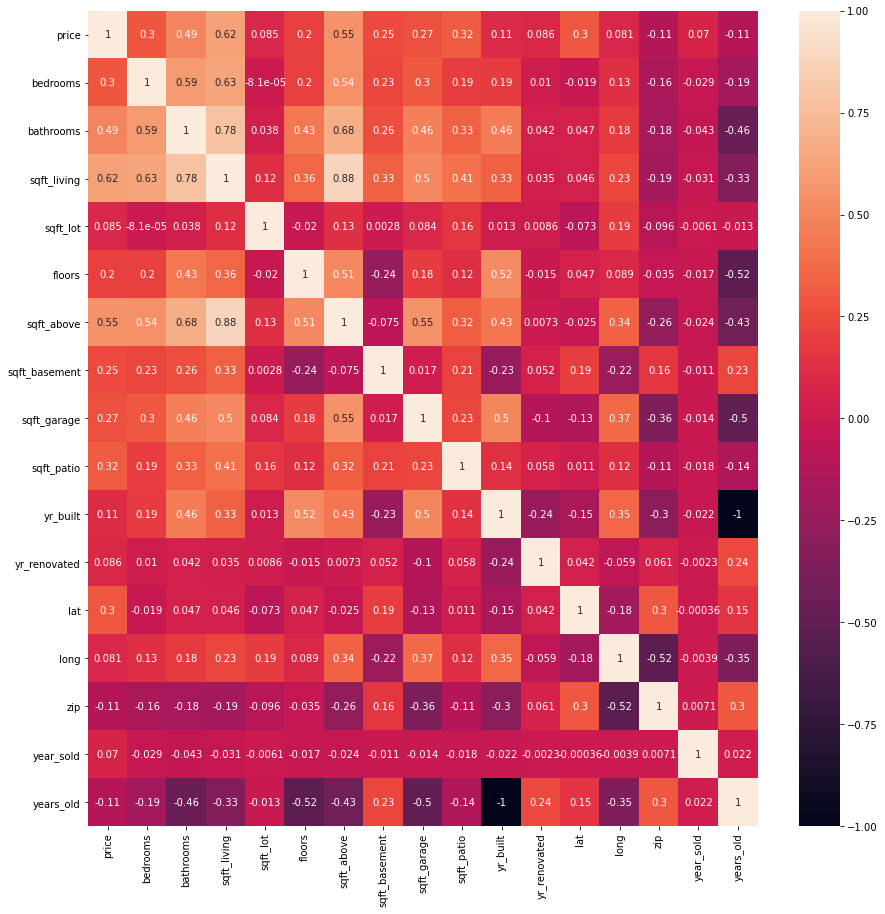

In [9]:
#plot the heatmap to determine correlations
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(hd.corr(), annot=True);

In [10]:
#list correlations
price_corrs = hd.corr()['price'].map(abs).sort_values(ascending=False)
price_corrs

price            1.000000
sqft_living      0.620031
sqft_above       0.548998
bathrooms        0.491554
sqft_patio       0.318564
lat              0.298932
bedrooms         0.295246
sqft_garage      0.269089
sqft_basement    0.247329
floors           0.201824
yr_built         0.107174
years_old        0.107174
zip              0.106424
yr_renovated     0.085950
sqft_lot         0.084915
long             0.081081
year_sold        0.070238
Name: price, dtype: float64

## Simple Linear Regression - Baseline Model with Train-Test Split

In [11]:
# define variables for simple linear regression
y = hd['price']
X = hd.drop('price', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# double check train-test split 
print(f"X_train is a DataFrame with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

# We always should have the same number of rows in X as values in y
assert X_train.shape[0] == y_train.shape[0]

X_train is a DataFrame with 21874 rows and 26 columns
y_train is a Series with 21874 values


In [12]:
# select our best correlated predictor, as our X Train
baseline_X_train = X_train[['sqft_living']]

# Do the same for X Test
baseline_X_test = X_test[['sqft_living']]

# instantiate the baseline model
baseline_model = LinearRegression()

# Fit our model
baseline_model.fit(baseline_X_train, y_train)

# Get our R2 score
print('Base Training R2:', round(baseline_model.score(baseline_X_train, y_train), 4))
print('Base Test R2:', round(baseline_model.score(baseline_X_test, y_test), 4))
print()

print("Baseline Model Train score:", round(baseline_scores["train_score"].mean(), 4))

# Calculate predictions on training and test sets
train_preds = baseline_model.predict(baseline_X_train)
test_preds = baseline_model.predict(baseline_X_test)

# Calculate training and test MSE
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
print('Train Root Mean Squared Error:', train_rmse)
print('Test Root Mean Squared Error:', test_rmse)
print('Difference in RMSE for Test/Train:', abs(round(test_rmse - train_rmse, 2)))

Base Training R2: 0.3808
Base Test R2: 0.396

Validation Checks
Baseline Model Train score: 0.375
Baseline Model Validation score: 0.4013

Train Root Mean Squared Error: 707566.4017003833
Test Root Mean Squared Error: 678521.5768046909
Difference in RMSE for Test/Train: 29044.82


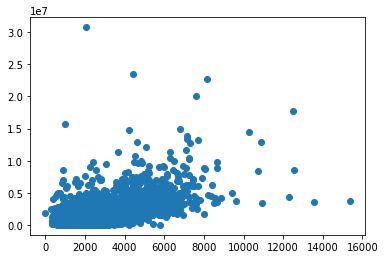

In [13]:
plt.scatter(x=hd["sqft_living"], y=hd["price"]);

## Polynomial Model

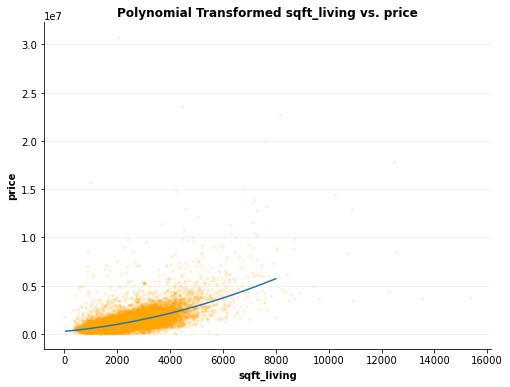

In [14]:
# fit and transform the X_train sqft_living column to a poly of 2
poly2 = PolynomialFeatures(2)
poly_sqft = poly2.fit_transform(X_train[['sqft_living']])

# instantiate a PolynomialFeatures and fit/transfrom to X_poly
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(baseline_X_train)

# fit X_poly to Linear Regression model 
reg_poly = LinearRegression().fit(X_poly, y_train)

# create line parameters 
X_linspace = pd.DataFrame(np.linspace(50, 8000, 50), columns= ['sqft_living'])

# create poly line X and Y values
X_linspace_fin = poly.fit_transform(X_linspace)
y_poly_pred = reg_poly.predict(X_linspace_fin)

# set up fig
fig, ax = plt.subplots(figsize=(8, 6))

# plot polynomial regression line against the data
plt.scatter(hd['sqft_living'], hd['price'], 
            s = 5, alpha = 0.1, 
            color='orange')

plt.plot(X_linspace, y_poly_pred)
plt.xlabel('sqft_living', weight = 'bold')
plt.ylabel('price', weight = 'bold')
ax.set_title('Polynomial Transformed sqft_living vs. price', weight = 'bold');

# removes top and right side axis
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# set gridline visibility
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

plt.show();

In [15]:
# instantiate a poly baseline model
poly_baseline_model = LinearRegression()

# Fit our poly model
poly_baseline_model.fit(X_poly, y_train)

print('Polynomial Base Training R2:', round(poly_baseline_model.score(X_poly, y_train), 4))

Polynomial Base Training R2: 0.4022


## Add School Data

In [16]:
#Import school data
new_school = pd.read_csv("data/New School Data - Sheet1.csv")

#Clean up school data
schoolnames = new_school.loc[new_school["Name"].str.contains("miles")]
schoolnames["id"]=range(1, len(schoolnames) + 1)
schoolloc = new_school.loc[new_school["Name"].str.contains("WA")]
schoolloc["id"]=range(1, len(schoolloc) + 1)
schoolloc=schoolloc.rename(columns={"Name": "Location"})
students = new_school.loc[new_school["Name"].str.contains("Students")]
students["id"]=range(1, len(students) + 1)
students=students.rename(columns={"Name": "student count"})

#Relabel grades for schools
grade = new_school.loc[new_school["Name"].str.contains("Grade")]
grade["id"]=range(1, len(grade) + 1)
grade=grade.rename(columns={"Name": "grades"})
grade.grades = grade.grades.apply(lambda x: "middle" if "Middle" in x else x)
grade.grades = grade.grades.apply(lambda x: "elementary" if "Primary" in x else x)
grade.grades = grade.grades.apply(lambda x: "high" if "High" in x else x)
grade.grades = grade.grades.apply(lambda x: "kindergarten" if "Kindergarten" in x else x)
grade.grades = grade.grades.apply(lambda x: "prek" if "Prekindergarten" in x else x)
grade.grades = grade.grades.apply(lambda x: "special education" if "Special" in x else x)
grade.grades = grade.grades.apply(lambda x: "middle" if "Regular School Grade: Grade 6 to Grade 8" in x else x)
grade.grades = grade.grades.apply(lambda x: "other" if "Other" in x else x)

#concat dataframes
waschools = pd.concat([schoolnames.set_index('id'),schoolloc.set_index('id'), grade.set_index('id'), students.set_index('id')], axis=1, join='inner')

<ipython-input-16-82cf259033ac>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  schoolnames["id"]=range(1, len(schoolnames) + 1)
<ipython-input-16-82cf259033ac>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  schoolloc["id"]=range(1, len(schoolloc) + 1)
<ipython-input-16-82cf259033ac>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [17]:
#Create zipcode and student population columns
waschools["zip"] = waschools["Location"].str[-6:]
waschools[["student count", "count"]] = waschools["student count"].str.split(":", expand=True)
waschools=waschools.drop(columns=["student count", "Location"])

#Relabel performance column with ordinal values
waschools["performance"] = 0
waschools["performance"].iloc[0:111] = 5
waschools["performance"].iloc[112:214] = 4
waschools["performance"].iloc[214:287] = 3
waschools["performance"].iloc[287:337] = 2
waschools["performance"].iloc[337:395] = 1

#Make new dataframe for all schools ranked at 1 or more for performance
newwaschools = waschools.loc[waschools["performance"]!=0]

#Make new dataframe that shows average performance rating by zipcode
schoolavg = newwaschools.groupby("zip").mean("performance").reset_index().sort_values(by="performance", ascending = False)
schoolavg["zip"]=schoolavg["zip"].astype(int)


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [18]:
prices = hd[["price", "zip"]].groupby(by=["zip"]).mean().sort_values(by="price", ascending=False).reset_index()
prices["zip"]=prices["zip"].astype(int)

In [19]:
schools_and_prices = pd.merge(prices, schoolavg, on = ["zip"]).sort_values(by=["performance"], ascending=False)

In [20]:
schools_and_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 62
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   zip          72 non-null     int64  
 1   price        72 non-null     float64
 2   performance  72 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 2.2 KB


In [21]:
schools_dict = dict(zip(schools_and_prices.zip, round(schools_and_prices.performance, 2)))
schools_dict

{98039: 5.0,
 98074: 5.0,
 98105: 5.0,
 98024: 5.0,
 98029: 5.0,
 98102: 5.0,
 98004: 5.0,
 98075: 5.0,
 98040: 5.0,
 98072: 4.8,
 98077: 4.8,
 98053: 4.75,
 98065: 4.75,
 98006: 4.75,
 98115: 4.71,
 98070: 4.67,
 98112: 4.67,
 98199: 4.5,
 98119: 4.5,
 98052: 4.5,
 98109: 4.5,
 98177: 4.5,
 98038: 4.5,
 98027: 4.4,
 98028: 4.4,
 98019: 4.33,
 98045: 4.33,
 98117: 4.33,
 98011: 4.33,
 98033: 4.25,
 98008: 4.12,
 98014: 4.0,
 98010: 4.0,
 98155: 4.0,
 98059: 4.0,
 98034: 4.0,
 98107: 4.0,
 98005: 4.0,
 98116: 3.8,
 98103: 3.75,
 98133: 3.71,
 98007: 3.5,
 98092: 3.3,
 98022: 3.29,
 98001: 3.22,
 98042: 3.14,
 98058: 3.1,
 98056: 3.0,
 98003: 3.0,
 98047: 3.0,
 98023: 2.92,
 98144: 2.83,
 98108: 2.57,
 98125: 2.5,
 98002: 2.33,
 98198: 2.29,
 98031: 2.27,
 98166: 2.25,
 98106: 2.0,
 98136: 2.0,
 98354: 2.0,
 98148: 2.0,
 98030: 1.86,
 98032: 1.8,
 98122: 1.75,
 98055: 1.67,
 98146: 1.5,
 98118: 1.5,
 98178: 1.25,
 98168: 1.22,
 98126: 1.2,
 98188: 1.0}

In [22]:
X_train['avg_school_quality'] = X_train['zip'].map(schools_dict)

<ipython-input-22-a4b485f5a02c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['avg_school_quality'] = X_train['zip'].map(schools_dict)


In [23]:
X_train

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,...,sqft_patio,yr_built,yr_renovated,address,lat,long,zip,year_sold,years_old,avg_school_quality
3667,8/24/2021,4,2.0,1700,7038,1.0,NO,NO,NO,NONE,...,0,1980,0,"10709 161st Avenue Northeast, Redmond, Washing...",47.696105,-122.124705,98052,2021,43,4.50
13621,8/12/2021,5,4.0,4980,172683,2.0,NO,NO,YES,NONE,...,830,1965,0,"5355 204th Place Northeast, Redmond, Washingto...",47.656110,-122.073150,98053,2021,58,4.75
1206,3/17/2022,3,2.5,1200,735,2.0,NO,NO,NO,NONE,...,320,2021,0,"4027B Whitman Ave N, Seattle, Washington 98103...",47.656030,-122.346090,98103,2022,2,3.75
19250,7/2/2021,5,3.5,3440,5520,2.0,NO,NO,YES,AVERAGE,...,190,1936,2004,"2801 28th Avenue West, Seattle, Washington 981...",47.644750,-122.393300,98199,2021,87,4.50
17750,5/11/2022,2,2.5,2050,2033,2.0,NO,NO,NO,AVERAGE,...,290,1981,0,"101 Northwest 58th Street, Seattle, Washington...",47.670380,-122.358203,98107,2022,42,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22317,2/10/2022,4,4.0,3390,7589,2.0,NO,YES,NO,NONE,...,300,2011,0,"6209 Whitaker Lane Southeast, Snoqualmie, Wash...",47.545390,-121.862670,98065,2022,12,4.75
5553,3/31/2022,3,1.0,1300,7777,1.0,NO,NO,NO,NONE,...,350,1953,0,"6315 36th Avenue Southwest, Seattle, Washingto...",47.546010,-122.378010,98126,2022,70,1.20
883,4/25/2022,3,2.5,1740,4277,2.0,NO,NO,NO,NONE,...,20,1992,0,"25760 Southeast 35th Place, Sammamish, Washing...",47.577610,-121.995820,98029,2022,31,5.00
16319,5/3/2022,4,2.0,2040,8382,2.0,NO,NO,NO,NONE,...,298,1953,1998,"10757 17th Avenue Southwest, Seattle, Washingt...",47.505465,-122.356845,98146,2022,70,1.50


In [24]:
scale_mapper1 = {"NONE":0, "FAIR": 1, "AVERAGE":2, "GOOD":3, "EXCELLENT":4}
X_train["view"] = X_train["view"].replace(scale_mapper1)

scale_mapper2 = {"Poor":0, "Fair": 1, "Average":2, "Good":3, "Very Good":4}
X_train["condition"] = X_train["condition"].replace(scale_mapper2)

scale_mapper3 = {"1 Cabin":1, "2 Substandard": 2, "3 Poor":3, "4 Low":4, "5 Fair":5, 
               "6 Low Average":6, "7 Average": 7, "8 Good":8, "9 Better":9, "10 Very Good":10,
               "11 Excellent": 11, "12 Luxury":12, "13 Mansion":13 }
X_train["grade"] = X_train["grade"].replace(scale_mapper3)

<ipython-input-24-7dad008bcee4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["view"] = X_train["view"].replace(scale_mapper1)
<ipython-input-24-7dad008bcee4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["condition"] = X_train["condition"].replace(scale_mapper2)
<ipython-input-24-7dad008bcee4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [25]:
X_train = pd.get_dummies(X_train, columns = ['waterfront', 'greenbelt', 'nuisance'], drop_first = True)

In [26]:
X_train = X_train.drop(columns=["heat_source", "sewer_system", "address", "lat", "long"])

In [27]:
X_train.loc[X_train['avg_school_quality'].isna()] = X_train['avg_school_quality'].mean()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21874 entries, 3667 to 24468
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                21874 non-null  object 
 1   bedrooms            21874 non-null  float64
 2   bathrooms           21874 non-null  float64
 3   sqft_living         21874 non-null  float64
 4   sqft_lot            21874 non-null  float64
 5   floors              21874 non-null  float64
 6   view                21874 non-null  float64
 7   condition           21874 non-null  float64
 8   grade               21874 non-null  float64
 9   sqft_above          21874 non-null  float64
 10  sqft_basement       21874 non-null  float64
 11  sqft_garage         21874 non-null  float64
 12  sqft_patio          21874 non-null  float64
 13  yr_built            21874 non-null  float64
 14  yr_renovated        21874 non-null  float64
 15  zip                 21874 non-null  float64
 16  y

# All Variable Model

In [28]:
all_variable_X = X_train
all_variable_X = all_variable_X.drop(columns=["date", "year_sold"])

In [29]:
all_variable_model = sm.OLS(y_train, sm.add_constant(all_variable_X)).fit()
all_variable_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     1252.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:38:48   Log-Likelihood:            -3.2256e+05
No. Observations:               21874   AIC:                         6.452e+05
Df Residuals:                   21853   BIC:                         6.453e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -4.058e+06   1.77e+05    -22.987      0.000    -4.4e+06   -3.71e+06
bedrooms           -8.733e+04   5950.991    -14.675      0.000    -9.9e+04   -7.57e+04
bathrooms           9.501e+04   8657.736     10.974      0.000     7.8e+04    1.12e+05
sqft_living          129.0518     19.579      6.591      0.000      90.675     167.429
sqft_lot              -0.3536      0.077     -4.614      0.000      -0.504      -0.203
floors             -1.066e+05   1.09e+04     -9.771      0.000   -1.28e+05   -8.52e+04
view                8.803e+04   5834.816     15.087      0.000    7.66e+04    9.95e+04
condition            2.72e+04   6604.840      4.118      0.000    1.43e+04    4.01e+04
grade               2.285e+05   6344.418     36.021      0.000    2.16e+05    2.41e+05
sqft_above           270.1727     19.879     13.591      0.000     231.208     309.138
sqft_basement        125.5652     14.700      8.542      0.000      96.753     154.377
sqft_garage         -207.9663     20.819     -9.989      0.000    -248.774    -167.159
sqft_patio            87.7963     19.419      4.521      0.000      49.735     125.858
yr_built           -1.074e+04   4445.710     -2.416      0.016   -1.95e+04   -2029.024
yr_renovated          27.3768     10.669      2.566      0.010       6.466      48.288
zip                  242.5413     91.465      2.652      0.008      63.264     421.818
years_old          -6856.8414   4495.828     -1.525      0.127   -1.57e+04    1955.308
avg_school_quality  1.503e+05   4128.660     36.397      0.000    1.42e+05    1.58e+05
waterfront_YES       9.54e+05   3.53e+04     27.023      0.000    8.85e+05    1.02e+06
greenbelt_YES      -1.769e+04   2.66e+04     -0.664      0.507   -6.99e+04    3.45e+04
nuisance_YES         3.66e+04   1.13e+04      3.234      0.001    1.44e+04    5.88e+04
==============================================================================
Omnibus:                    34186.751   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         73427177.122
Skew:                           9.441   Prob(JB):                         0.00
Kurtosis:                     286.209   Cond. No.                     4.29e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
# #add requirements for our stakeholder
# hd = hd.loc[(hd["bedrooms"] > 1) & (hd["bedrooms"]<=5)]
# hd = hd.loc[hd["price"]<=1300000]
# hd = hd.drop(columns=["date"])

# Recursive Feature Elimination Model

In [31]:
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select = 5)

In [32]:
select.fit(X = all_variable_X, y = y_train)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [33]:
select.ranking_

array([ 8,  1,  9, 16,  1,  2,  7,  1, 12, 13, 11, 14,  6, 15, 10,  5,  3,
        1,  1,  4])

In [34]:
all_variable_X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_garage',
       'sqft_patio', 'yr_built', 'yr_renovated', 'zip', 'years_old',
       'avg_school_quality', 'waterfront_YES', 'greenbelt_YES',
       'nuisance_YES'],
      dtype='object')

In [35]:
pd.DataFrame(data=select.ranking_, index=all_variable_X.columns)

,0
bedrooms,8
bathrooms,1
sqft_living,9
sqft_lot,16
floors,1
view,2
condition,7
grade,1
sqft_above,12
sqft_basement,13


In [36]:
rfe_X = all_variable_X[['bathrooms', 'floors', 'grade', 'avg_school_quality', 'greenbelt_YES', 'waterfront_YES']]
all_variable_model = sm.OLS(y_train, sm.add_constant(rfe_X)).fit()
all_variable_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     2862.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        10:38:49   Log-Likelihood:            -3.2457e+05
No. Observations:               21874   AIC:                         6.492e+05
Df Residuals:                   21867   BIC:                         6.492e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.354e+06   3.22e+04    -73.002      0.000   -2.42e+06   -2.29e+06
bathrooms           1.942e+05   6904.233     28.123      0.000    1.81e+05    2.08e+05
floors             -2.249e+05   9468.476    -23.756      0.000   -2.43e+05   -2.06e+05
grade                3.64e+05   5476.317     66.475      0.000    3.53e+05    3.75e+05
avg_school_quality  1.605e+05   4274.981     37.536      0.000    1.52e+05    1.69e+05
greenbelt_YES      -4.256e+05    2.3e+04    -18.525      0.000   -4.71e+05   -3.81e+05
waterfront_YES      8.905e+05   2.39e+04     37.257      0.000    8.44e+05    9.37e+05
==============================================================================
Omnibus:                    32611.658   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         45766724.709
Skew:                           8.692   Prob(JB):                         0.00
Kurtosis:                     226.412   Cond. No.                         66.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pd.get_dummies(df, columns = [col1])